# Supervised Learning Capstone Project - Tree Methods Focus 


## GOAL: Create a model to predict whether or not a customer will Churn .



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**Confirming that there are no NaN cells by displaying NaN values per feature column:**

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**The balance of the class labels (Churn) with a Count Plot:**

<Axes: xlabel='Churn', ylabel='count'>

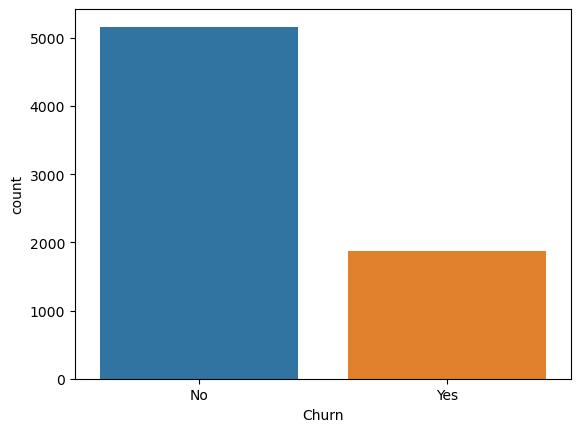

In [7]:
sns.countplot(data=df, x = 'Churn')

**The distrbution of TotalCharges between Churn categories with a Box Plot:**

<Axes: xlabel='Churn', ylabel='TotalCharges'>

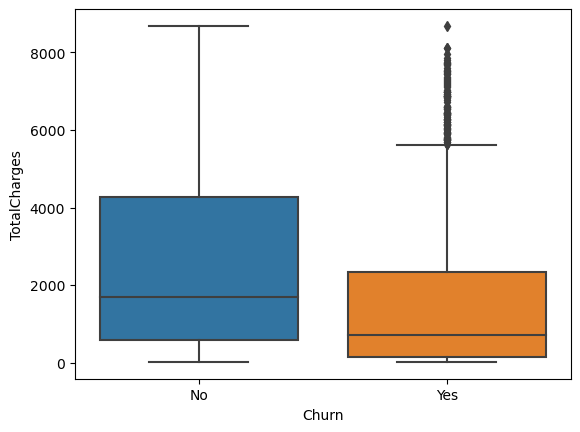

In [8]:
sns.boxplot(data = df,x ='Churn', y = 'TotalCharges')

**A boxplot showing the distribution of TotalCharges per Contract type:**

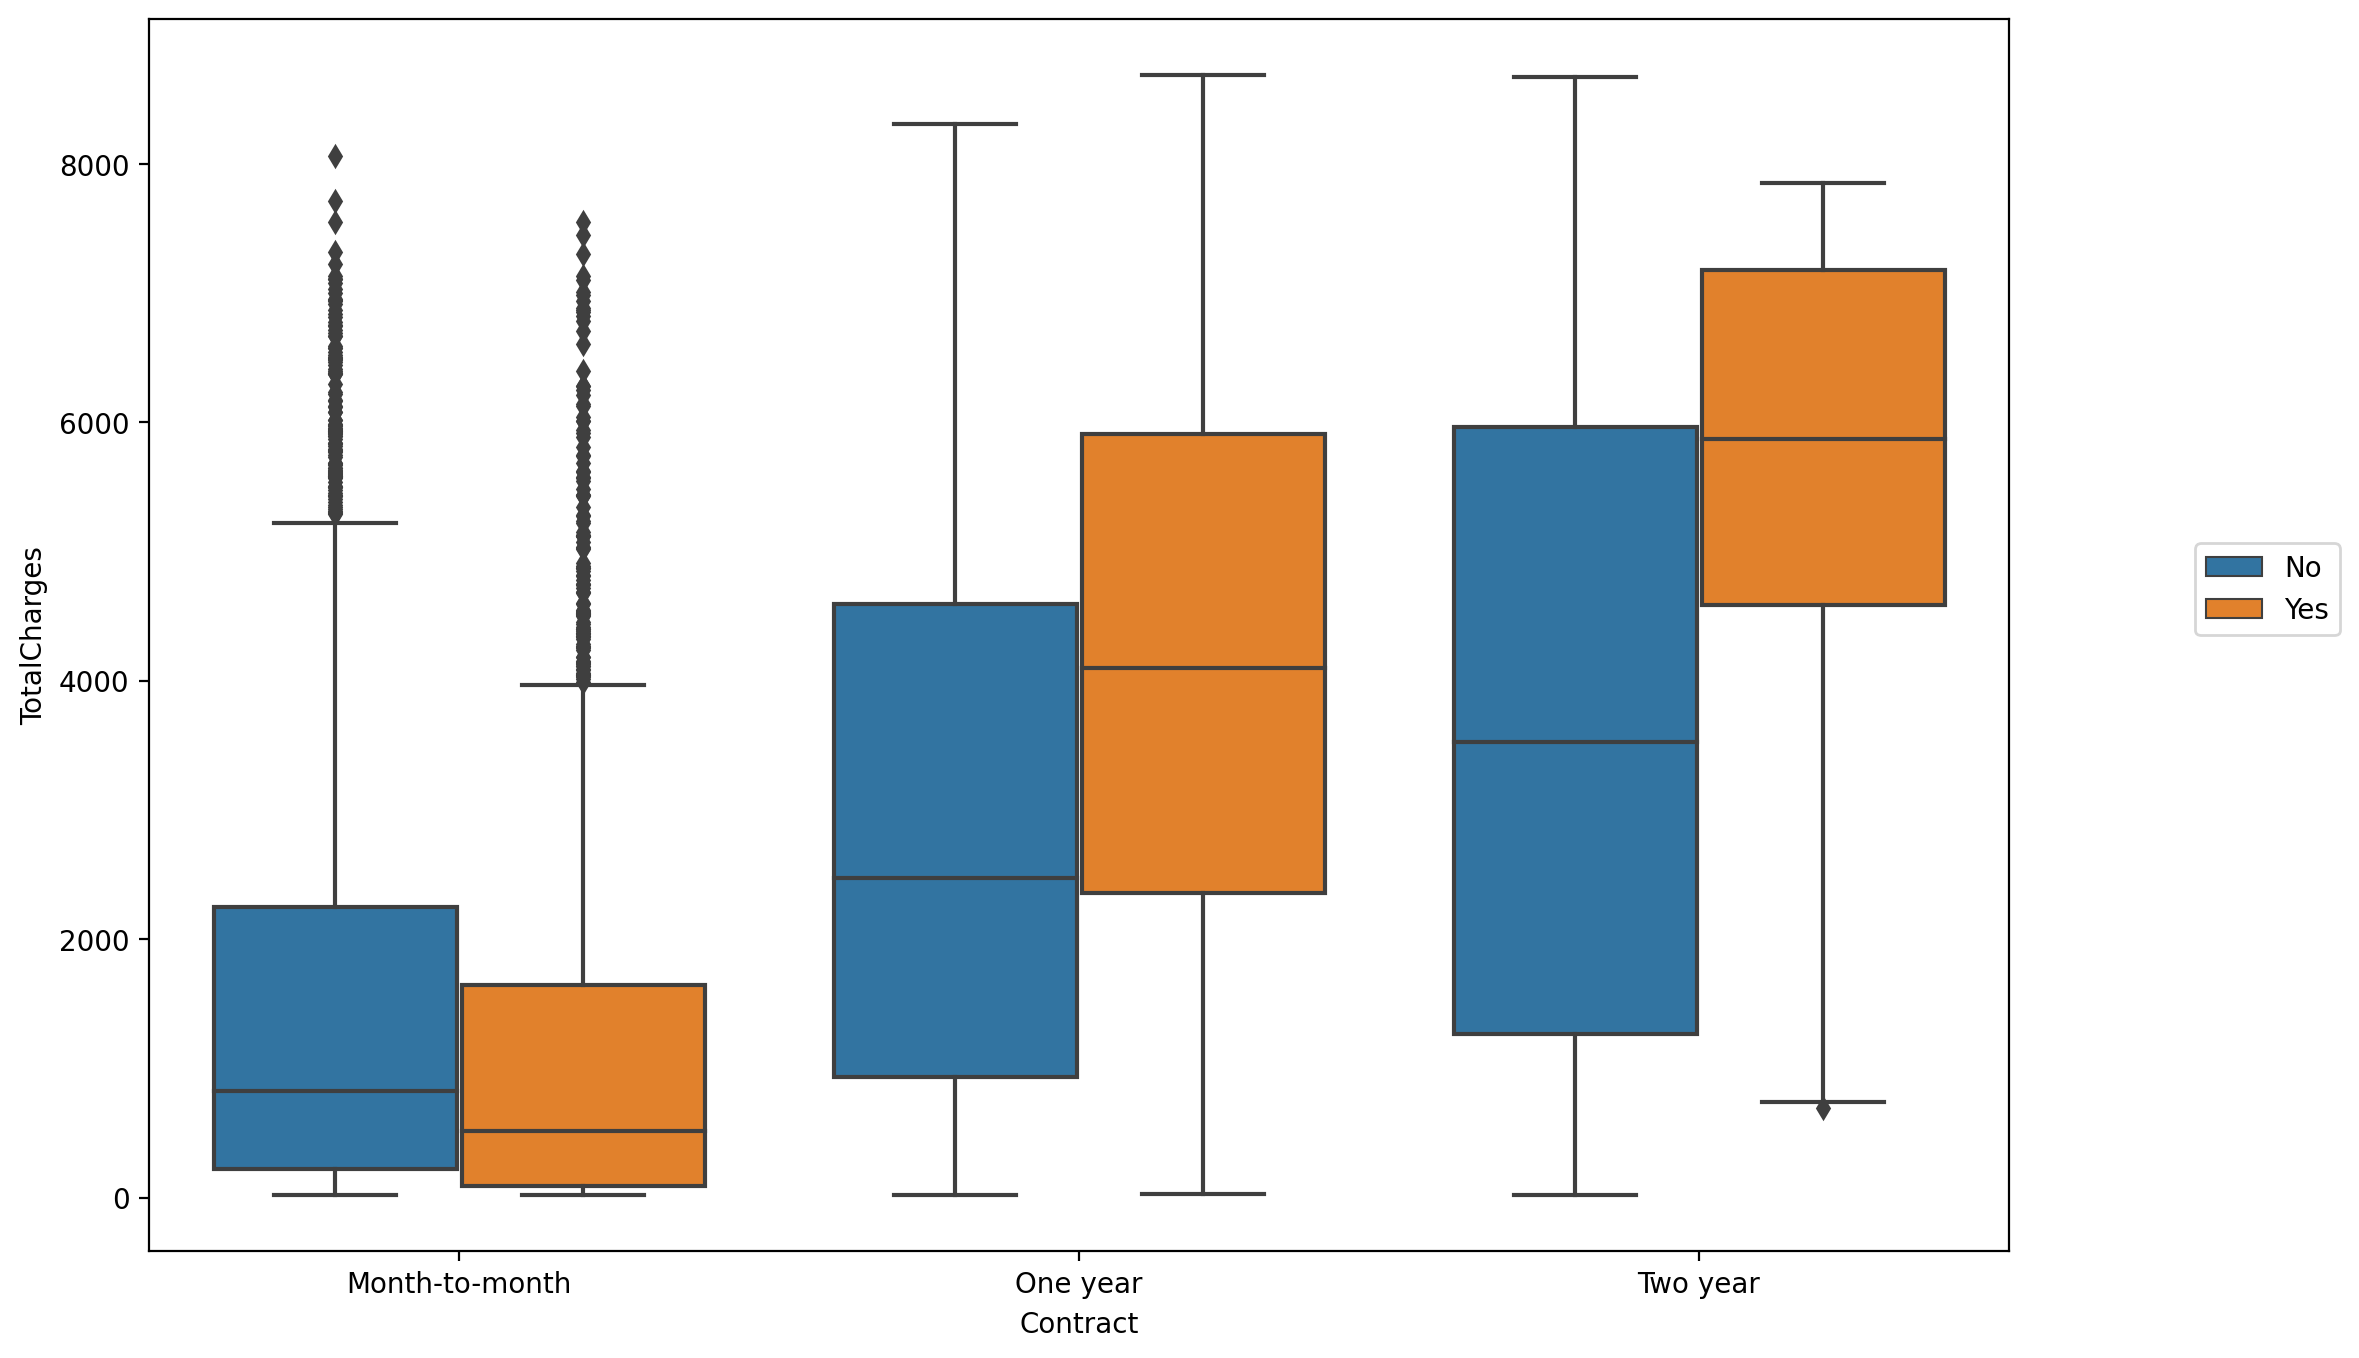

In [12]:
plt.figure(figsize=(12,8),dpi=200)
sns.boxplot(data = df, x ='Contract', y = 'TotalCharges', hue = 'Churn')
plt.legend(loc=(1.1,0.5))
#people are likely to churn after one or two years since the total charges are higher.

**A bar plot showing the correlation of the following features to the class label:**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [16]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']]).corr()

In [21]:
corr_Yes_churn = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

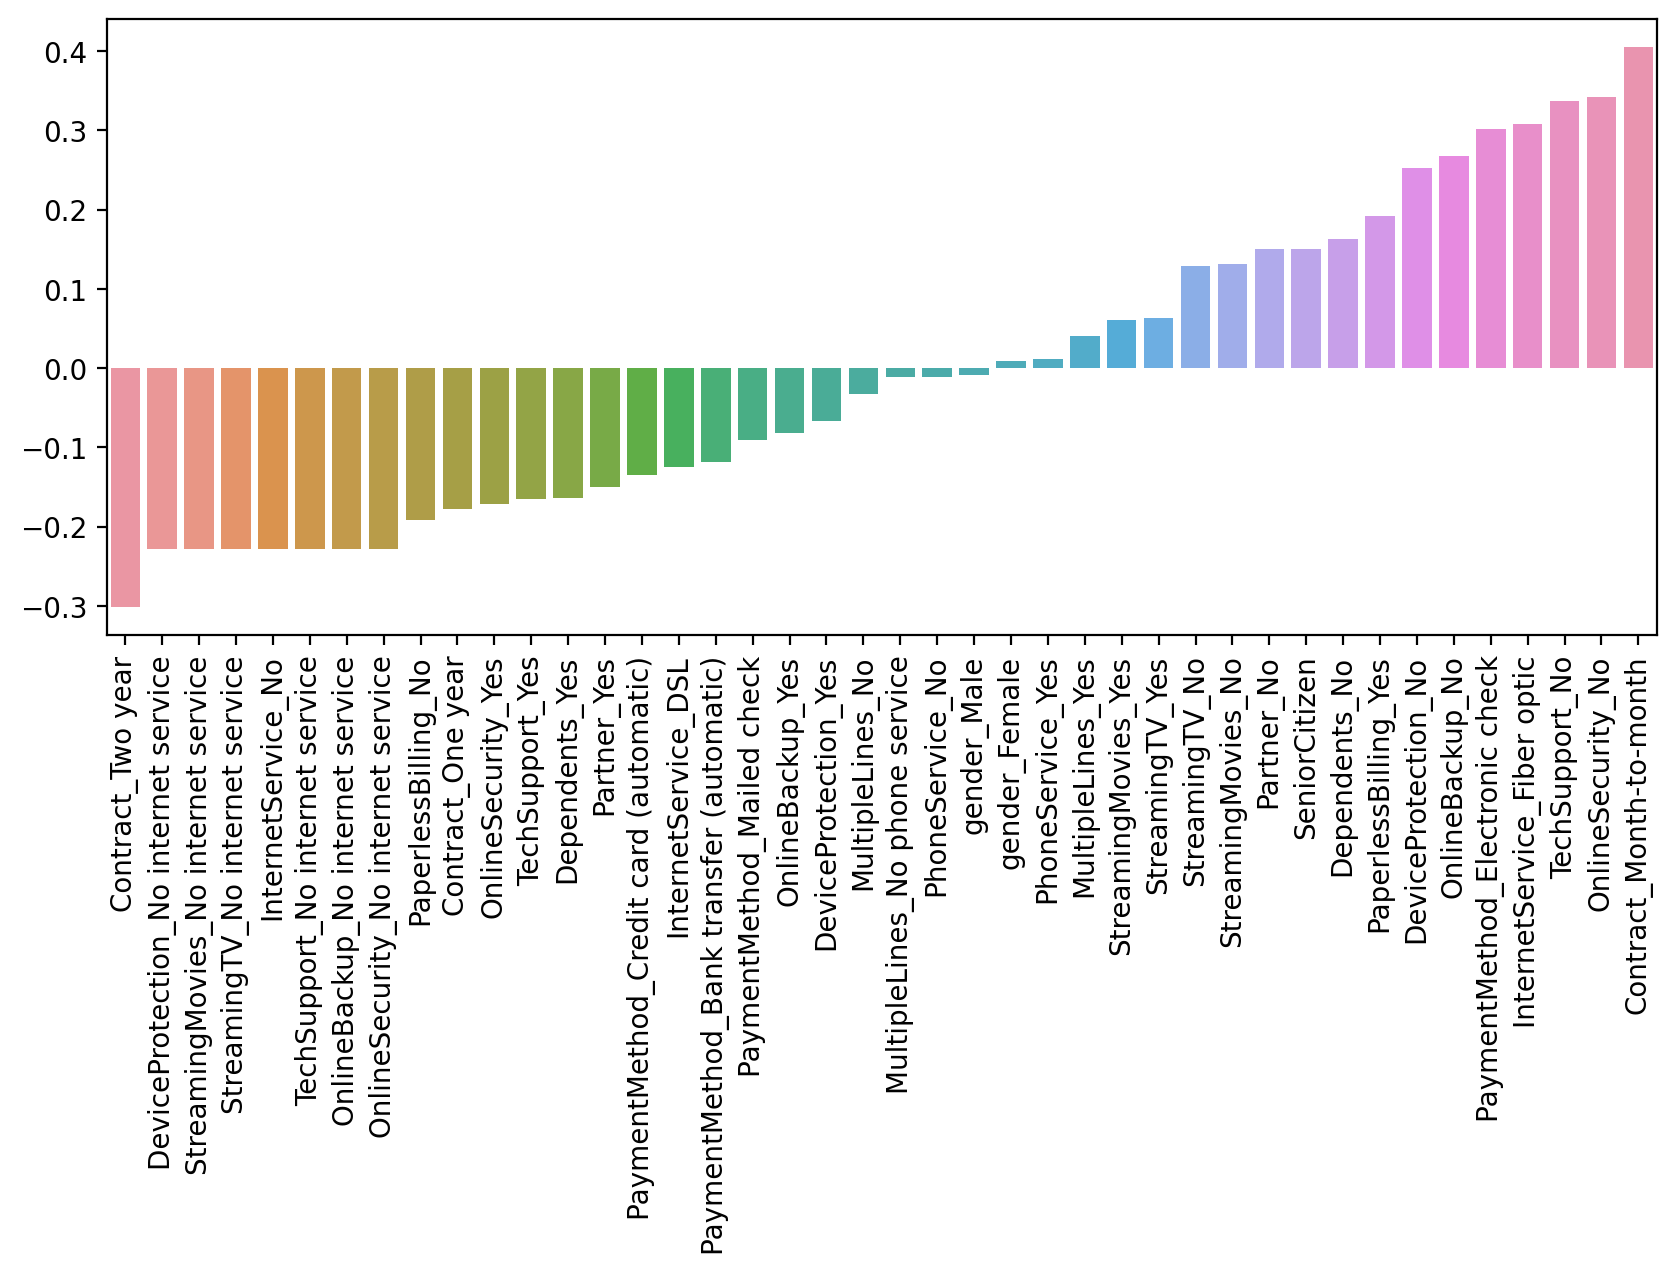

In [28]:
plt.figure(figsize=(10,4),dpi = 200)
sns.barplot(x=corr_Yes_churn.index, y=corr_Yes_churn.values)
plt.xticks(rotation = 90);



# Part 3: Churn Analysis


**3 contract types:**

In [29]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**A histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer:**

<Axes: xlabel='tenure', ylabel='Count'>

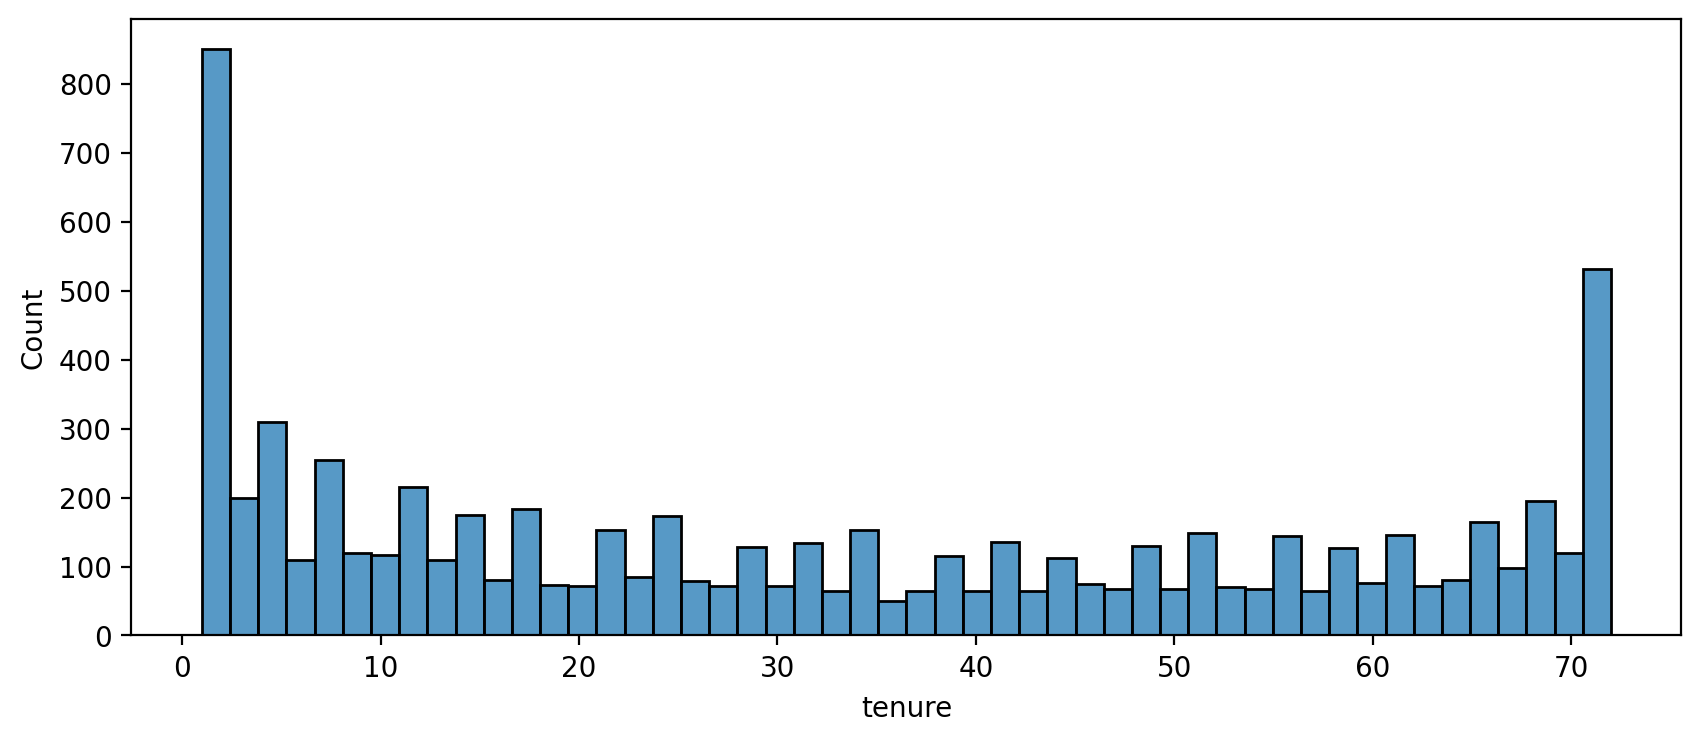

In [31]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data = df , x ='tenure',bins = 50)

<Figure size 2000x600 with 0 Axes>

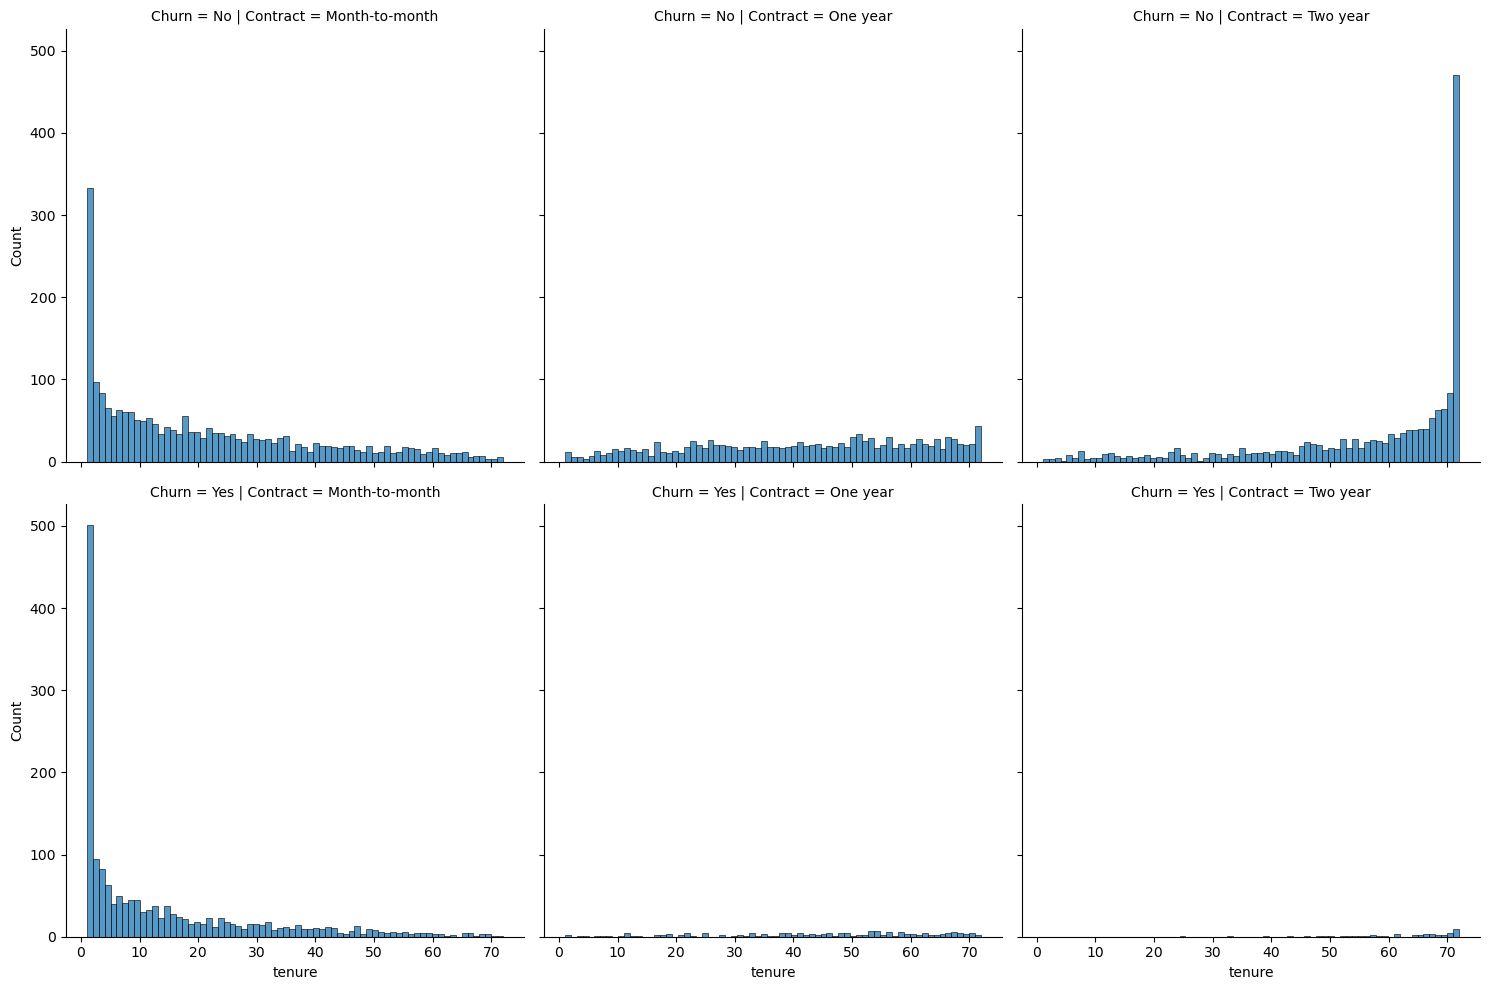

In [32]:
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

**Ascatter plot of Total Charges versus Monthly Charges:**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

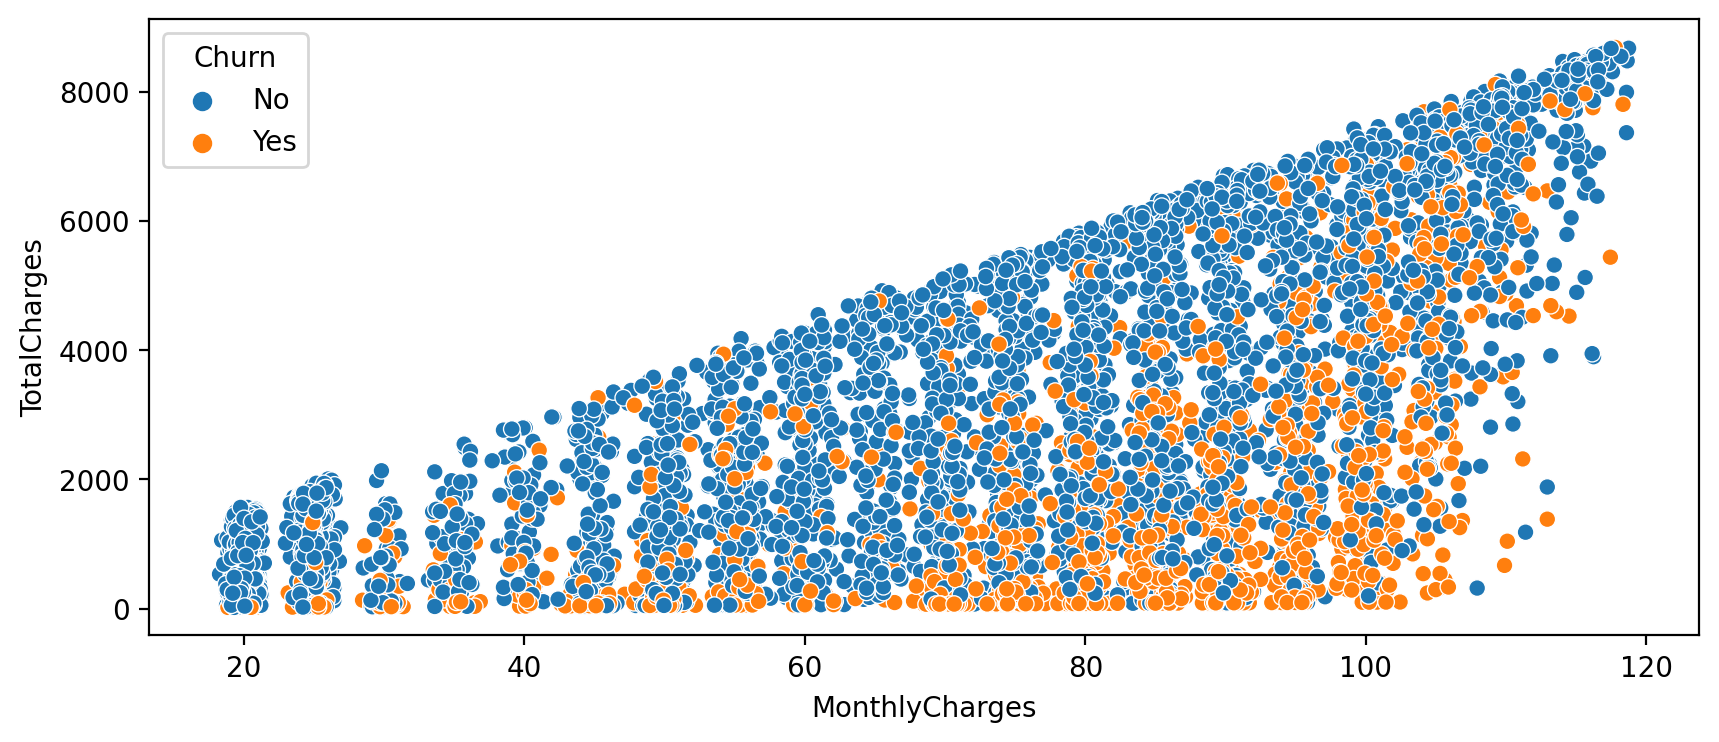

In [35]:
plt.figure(figsize=(10,4),dpi = 200)
sns.scatterplot(data = df, y= 'TotalCharges', x = 'MonthlyCharges', hue ='Churn')

### Creating Cohorts based on Tenure



In [50]:
yes_churn= df.groupby(['Churn','tenure']).count().transpose()['Yes']
no_churn= df.groupby(['Churn','tenure']).count().transpose()['No']

In [54]:
churn_rate = 100*yes_churn/(yes_churn+no_churn)

In [58]:
churn_rate.transpose()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
tenure,,,,,,,,,,,,,,,,,,,
1,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212
2,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672
3,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
4,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091
5,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
69,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053
70,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697


<Axes: xlabel='tenure', ylabel='customerID'>

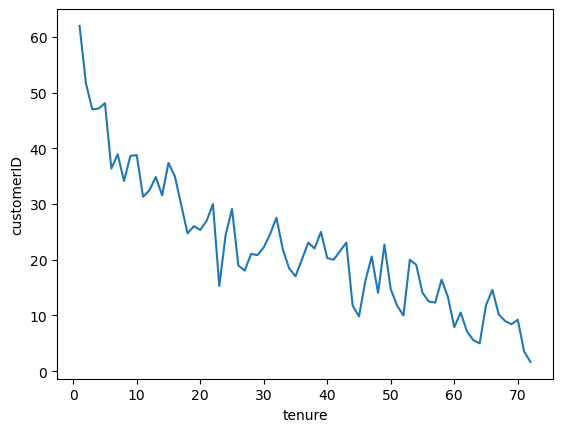

In [61]:
sns.lineplot(data =churn_rate.transpose()['customerID'])

### Broader Cohort Groups
**A new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [69]:
def cohort(tenure):
    if tenure<13:
        return '0-12 Months'
    if tenure<25:
        return '12-24 Months'
    if tenure<49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [70]:
df['Tenure Cohort']= df['tenure'].apply(cohort)

**A scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task:**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

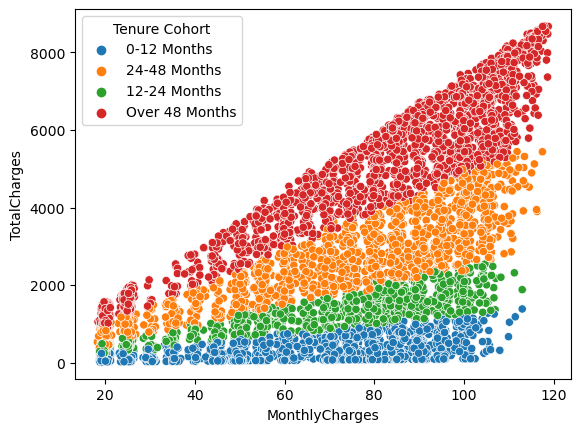

In [71]:
sns.scatterplot(data= df, x ='MonthlyCharges' , y = 'TotalCharges', hue = 'Tenure Cohort')

**A count plot showing the churn count per cohort:**

<Axes: xlabel='Tenure Cohort', ylabel='count'>

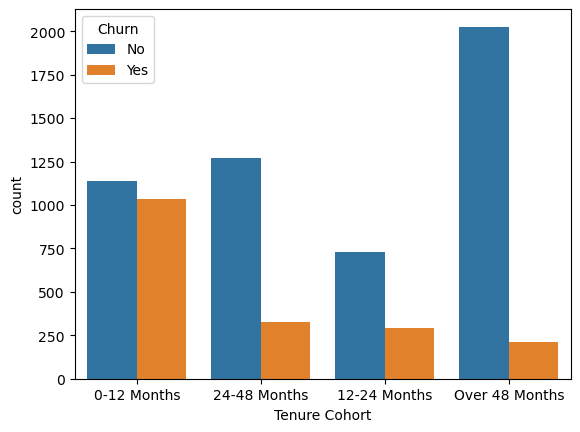

In [75]:
sns.countplot(data= df, x ='Tenure Cohort', hue='Churn')

**A grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue:**

<Figure size 2000x800 with 0 Axes>

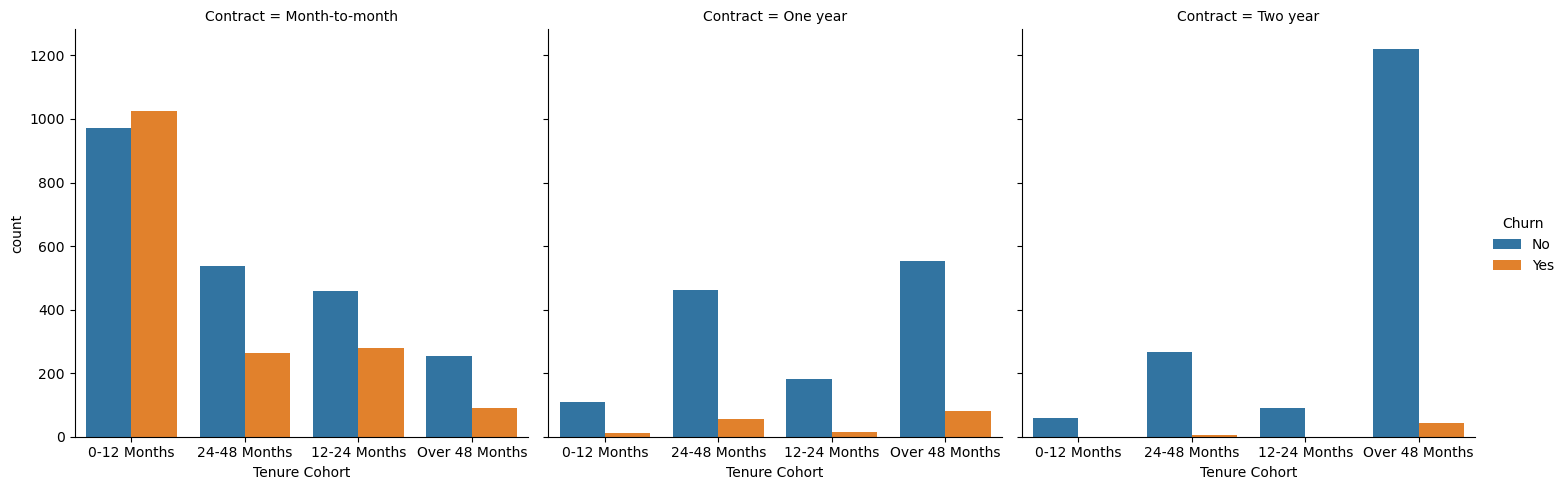

In [76]:
plt.figure(figsize=(10,4),dpi=200)
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count')

-----

# Part 4: Predictive Modeling



## Single Decision Tree

In [78]:
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)

In [82]:
y= df['Churn']

In [80]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
model = DecisionTreeClassifier(max_depth=6)
model.fit(X_train, y_train)
pred_model = simple_model.predict(X_test)

In [142]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [97]:
print(classification_report(y_test,pred_model))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



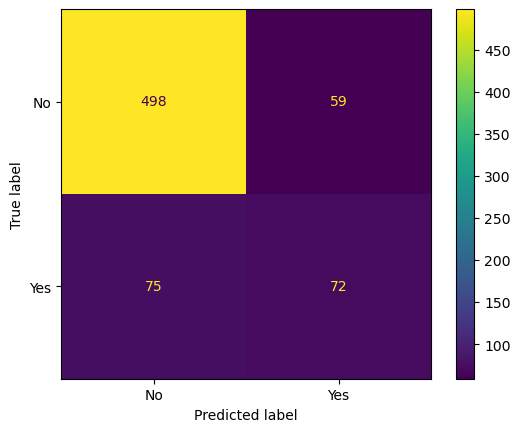

In [131]:
ConfusionMatrixDisplay.from_estimator(model,X_test, y_test)

In [102]:
model.feature_importances_

array([0.01082504, 0.42391407, 0.04534099, 0.06494213, 0.00123697,
       0.        , 0.        , 0.00088963, 0.00696195, 0.01243191,
       0.31406016, 0.        , 0.        , 0.00837585, 0.        ,
       0.00534132, 0.        , 0.        , 0.        , 0.00786752,
       0.        , 0.        , 0.02628952, 0.        , 0.01002118,
       0.02706543, 0.        , 0.        , 0.03443632, 0.        ,
       0.        , 0.        , 0.        ])

In [107]:
fe_impo = pd.DataFrame(data =model.feature_importances_ , index = X.columns , columns=['Feature Importance']).sort_values('Feature Importance')

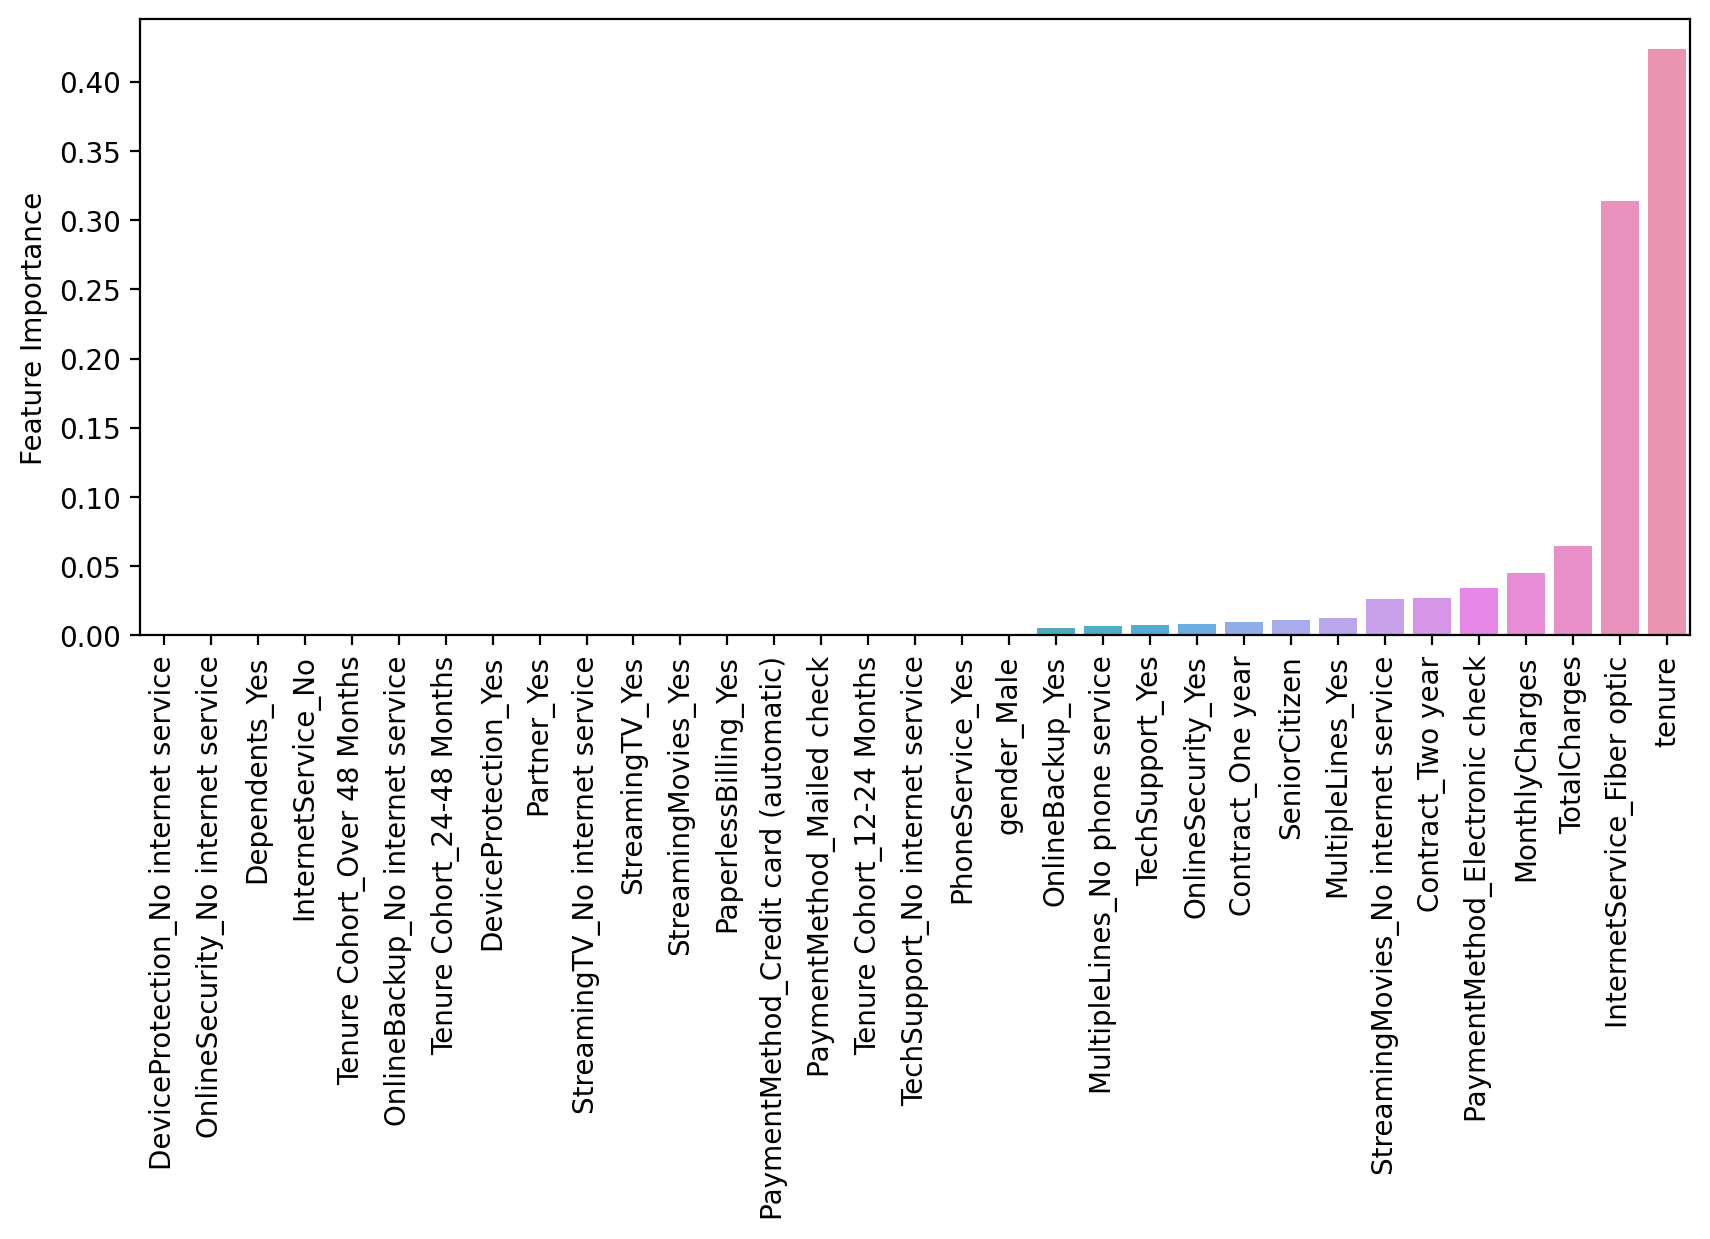

In [116]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(data=fe_impo.sort_values('Feature Importance'),x=fe_impo.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90);

In [117]:
from sklearn.tree import plot_tree

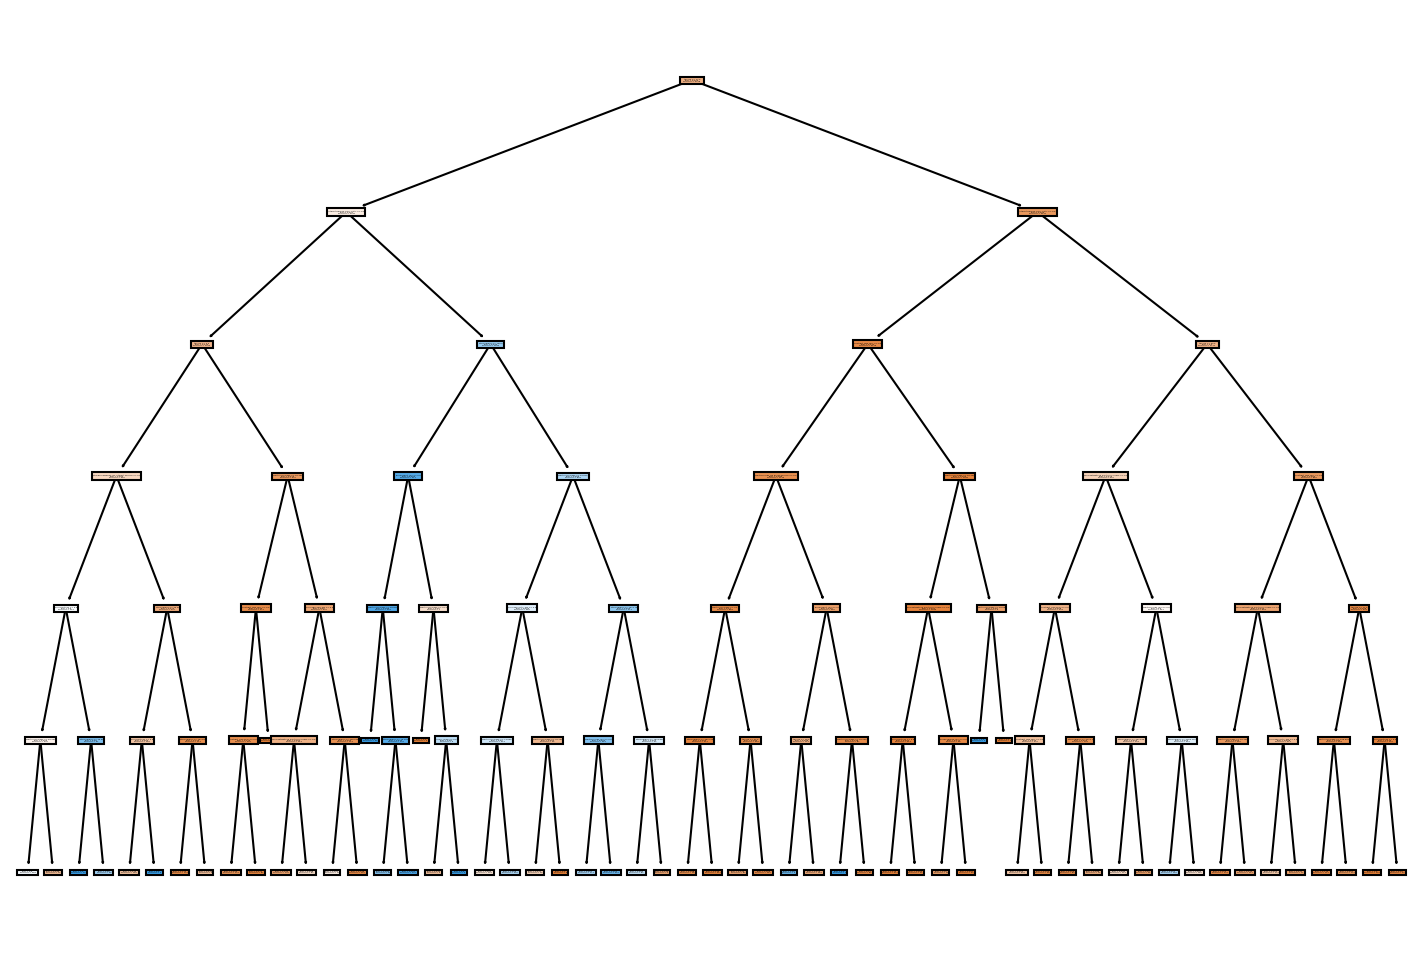

In [119]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns);

## Random Forest



In [124]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
model1 = RandomForestClassifier(n_estimators = 100)

In [129]:
model1.fit(X_train,y_train)
pred_model1 = model1.predict(X_test)

In [130]:
print(classification_report(y_test,pred_model1))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.50      0.46      0.48       147

    accuracy                           0.79       704
   macro avg       0.68      0.67      0.68       704
weighted avg       0.79      0.79      0.79       704



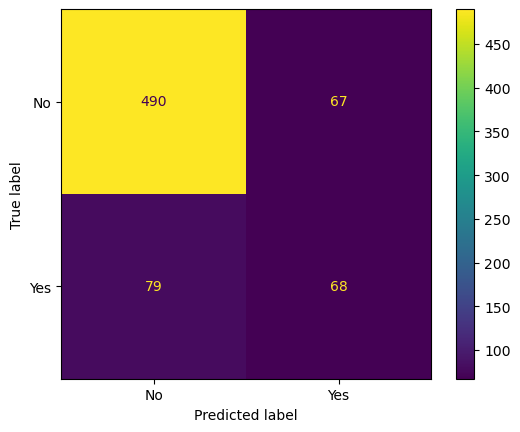

In [132]:
ConfusionMatrixDisplay.from_estimator(model1,X_test, y_test)

## Boosted Trees


In [133]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [134]:
ada_model = AdaBoostClassifier()

In [138]:
ada_model.fit(X_train,y_train)
preds = ada_model.predict(X_test)

In [141]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



In [143]:
confusion_matrix(y_test,preds)

array([[504,  53],
       [ 67,  80]])

**Which model performed best?**

In [1]:
# With base models, we got best performance from an AdaBoostClassifier.